## Plotting with Histogram

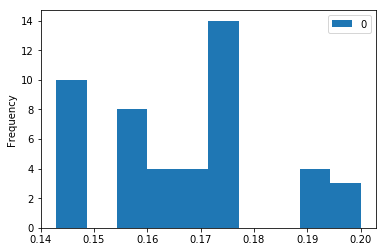

In [2]:
import pandas as pd
import pymc3 as pm
import numpy as np
import matplotlib
import matplotlib.pyplot as plt


data = np.array([0.170717, 0.174359, 0.172085, 0.171650, 0.171511, 0.175207,
                         0.174769, 0.174633, 0.174814, 0.174655, 0.199607, 0.198277,
                         0.199973, 0.142929, 0.143697, 0.143240, 0.143503, 0.144641,
                         0.143488, 0.145386, 0.143688, 0.144603, 0.144529, 0.191608,
                         0.192063, 0.192355, 0.193154, 0.156040, 0.158525, 0.155890,
                         0.156021, 0.155429, 0.157540, 0.156556, 0.158478, 0.161370,
                         0.161220, 0.167436, 0.161289, 0.162017, 0.167989, 0.170717,
                         0.174359, 0.172085, 0.171650, 0.171511, 0.175207])


df = pd.DataFrame(data)
plt.title("Histogram")
plt.xlabel("Value")
%matplotlib inline
df.plot(kind='hist')



## Probability density histogram

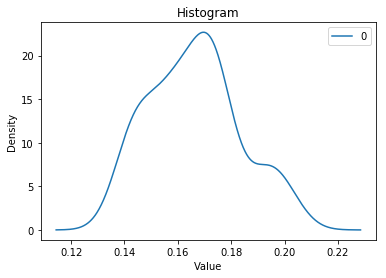

In [3]:
df = pd.DataFrame(data)
df.plot(kind='density')
plt.title("Histogram")
plt.xlabel("Value")


## Modeling the prior as Normal Disribution

In [33]:
with pm.Model():
    mu = pm.Uniform('mu', 0, 1) #prior 
    #mu = pm.StudentT("mu", nu=1, lam = 1/sigma)
    sigma = .01
   
    returns = pm.Normal('returns', mu=mu, sd=sigma, observed=data) #likelihood 
    #returns = pm.StudentT("returns", nu=1, lam = 1/sigma, mu = mu, observed = data)

    step = pm.NUTS()
    trace = pm.sample(10000, step, tune=500)

100%|██████████| 10500/10500 [00:06<00:00, 1731.08it/s]


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1215cc588>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x1217dec88>]], dtype=object)

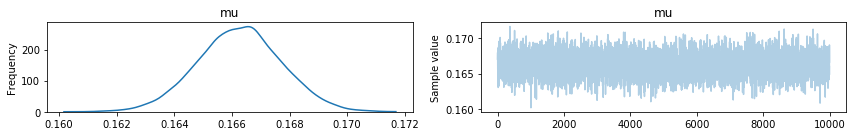

In [34]:
pm.traceplot(trace)

In [35]:
pm.summary(trace)


mu:

  Mean             SD               MC Error         95% HPD interval
  -------------------------------------------------------------------
  
  0.166            0.001            0.000            [0.163, 0.169]

  Posterior quantiles:
  2.5            25             50             75             97.5
  |--------------|==============|==============|--------------|
  
  0.163          0.165          0.166          0.167          0.169



array([<matplotlib.axes._subplots.AxesSubplot object at 0x121ef95c0>], dtype=object)

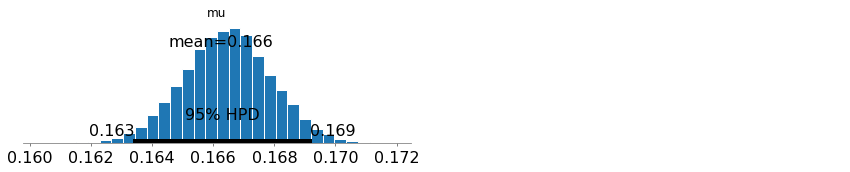

In [36]:
pm.plots.plot_posterior(trace)

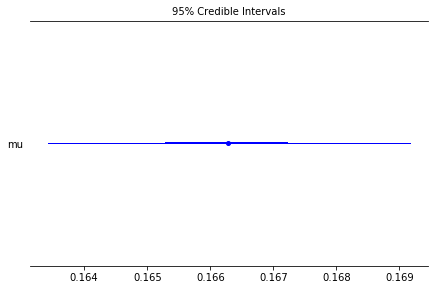

In [37]:
pm.plots.forestplot(trace)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1241d5b38>]], dtype=object)

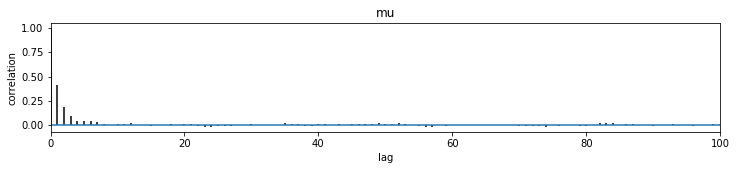

In [38]:
pm.plots.autocorrplot(trace)